# Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.


# Target /Output
-	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we can see that Loan_Id columns does not effect the prediction , so we can remove from the dataset

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [12]:
df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.shape

(614, 12)

In [14]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So many null are present in dataset

In [15]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

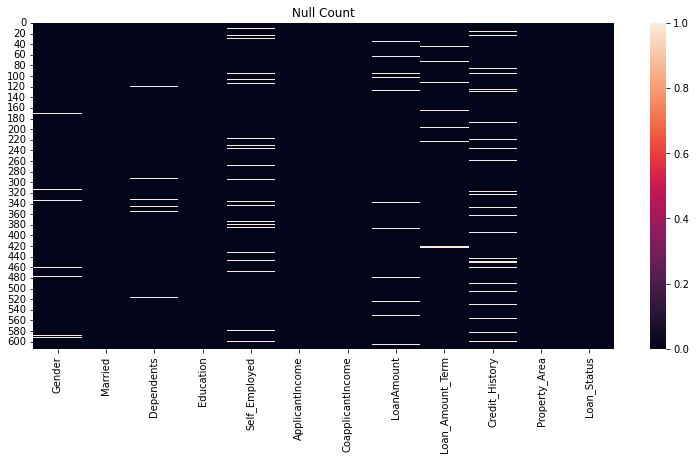

In [17]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.title("Null Count")
plt.show

In [18]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [19]:
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        print(x)
        print(df[x].value_counts())
        print('*'*30)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
******************************
Married
Yes    398
No     213
Name: Married, dtype: int64
******************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
******************************
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
******************************


<AxesSubplot:>

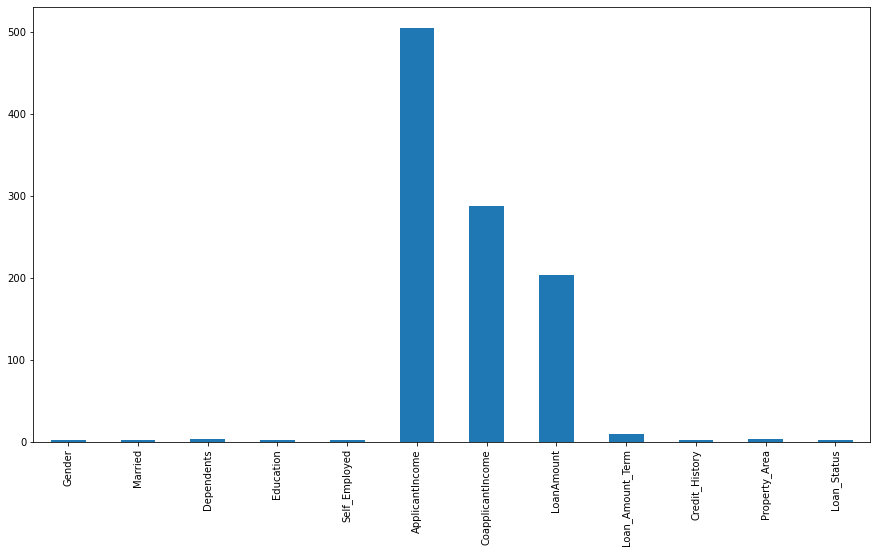

In [21]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')

<AxesSubplot:xlabel='Gender', ylabel='count'>

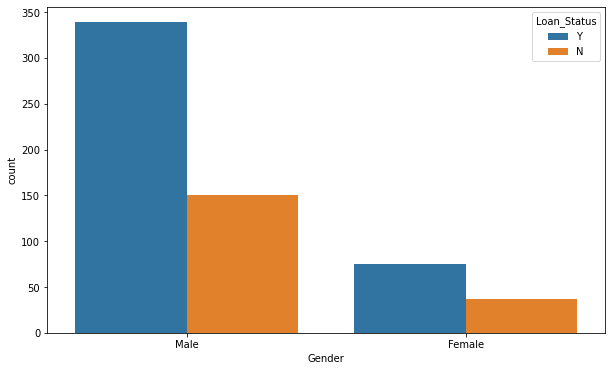

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

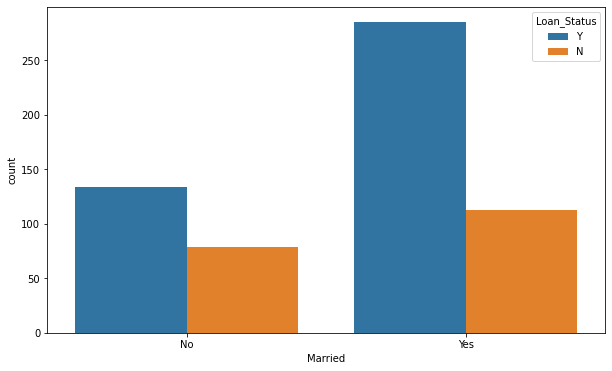

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

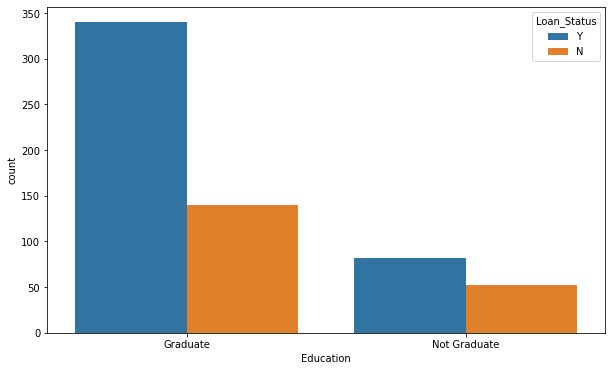

In [24]:
plt.figure(figsize=(10,6))
sns.countplot('Education',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

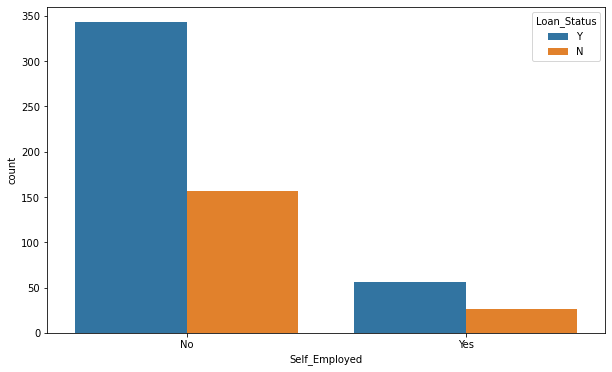

In [25]:
plt.figure(figsize=(10,6))
sns.countplot('Self_Employed',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

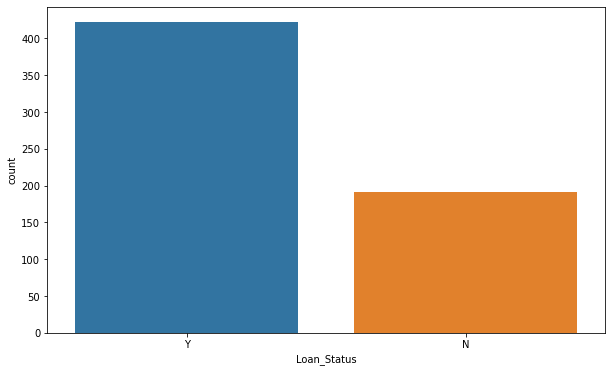

In [26]:
plt.figure(figsize=(10,6))
sns.countplot('Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

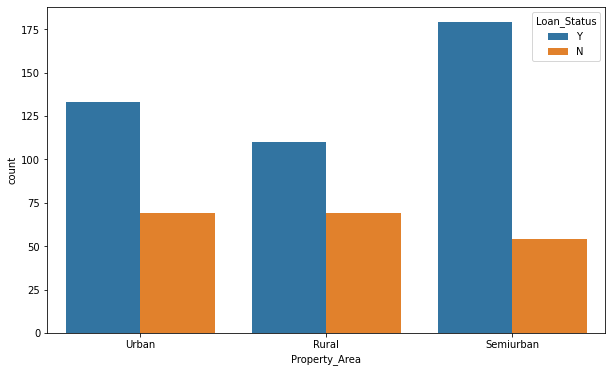

In [27]:
plt.figure(figsize=(10,6))
sns.countplot('Property_Area',data=df,hue='Loan_Status')

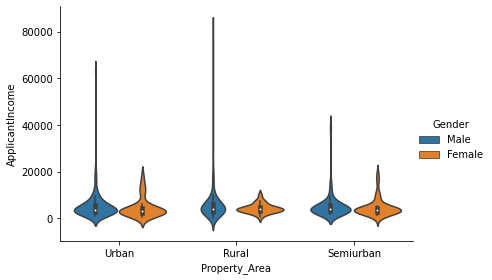

In [28]:
sns.catplot(x='Property_Area',y='ApplicantIncome',hue='Gender',data=df,height=4,aspect=1.5,kind='violin')

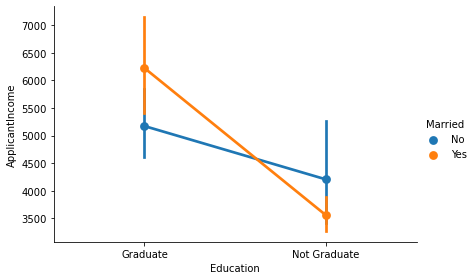

In [32]:
sns.catplot(x='Education',y='ApplicantIncome',hue='Married',data=df,height=4,aspect=1.5,kind='point')

 Married and graduate  have high income but who are not not Graduate they are having lowest income in data set , those are are unmarried and graduate they are earnig good but less than those who are married graduate

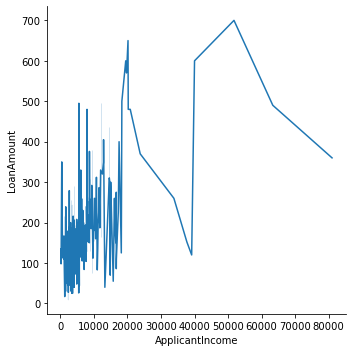

In [33]:
sns.relplot(x='ApplicantIncome', y="LoanAmount", kind="line", data=df)
plt.show()

Trend is showing that when there is high income chances of getting high laon approved will increase

In [34]:
#filling null values using mean & mode function

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [35]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now no null values are present in dataset

In [36]:
# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

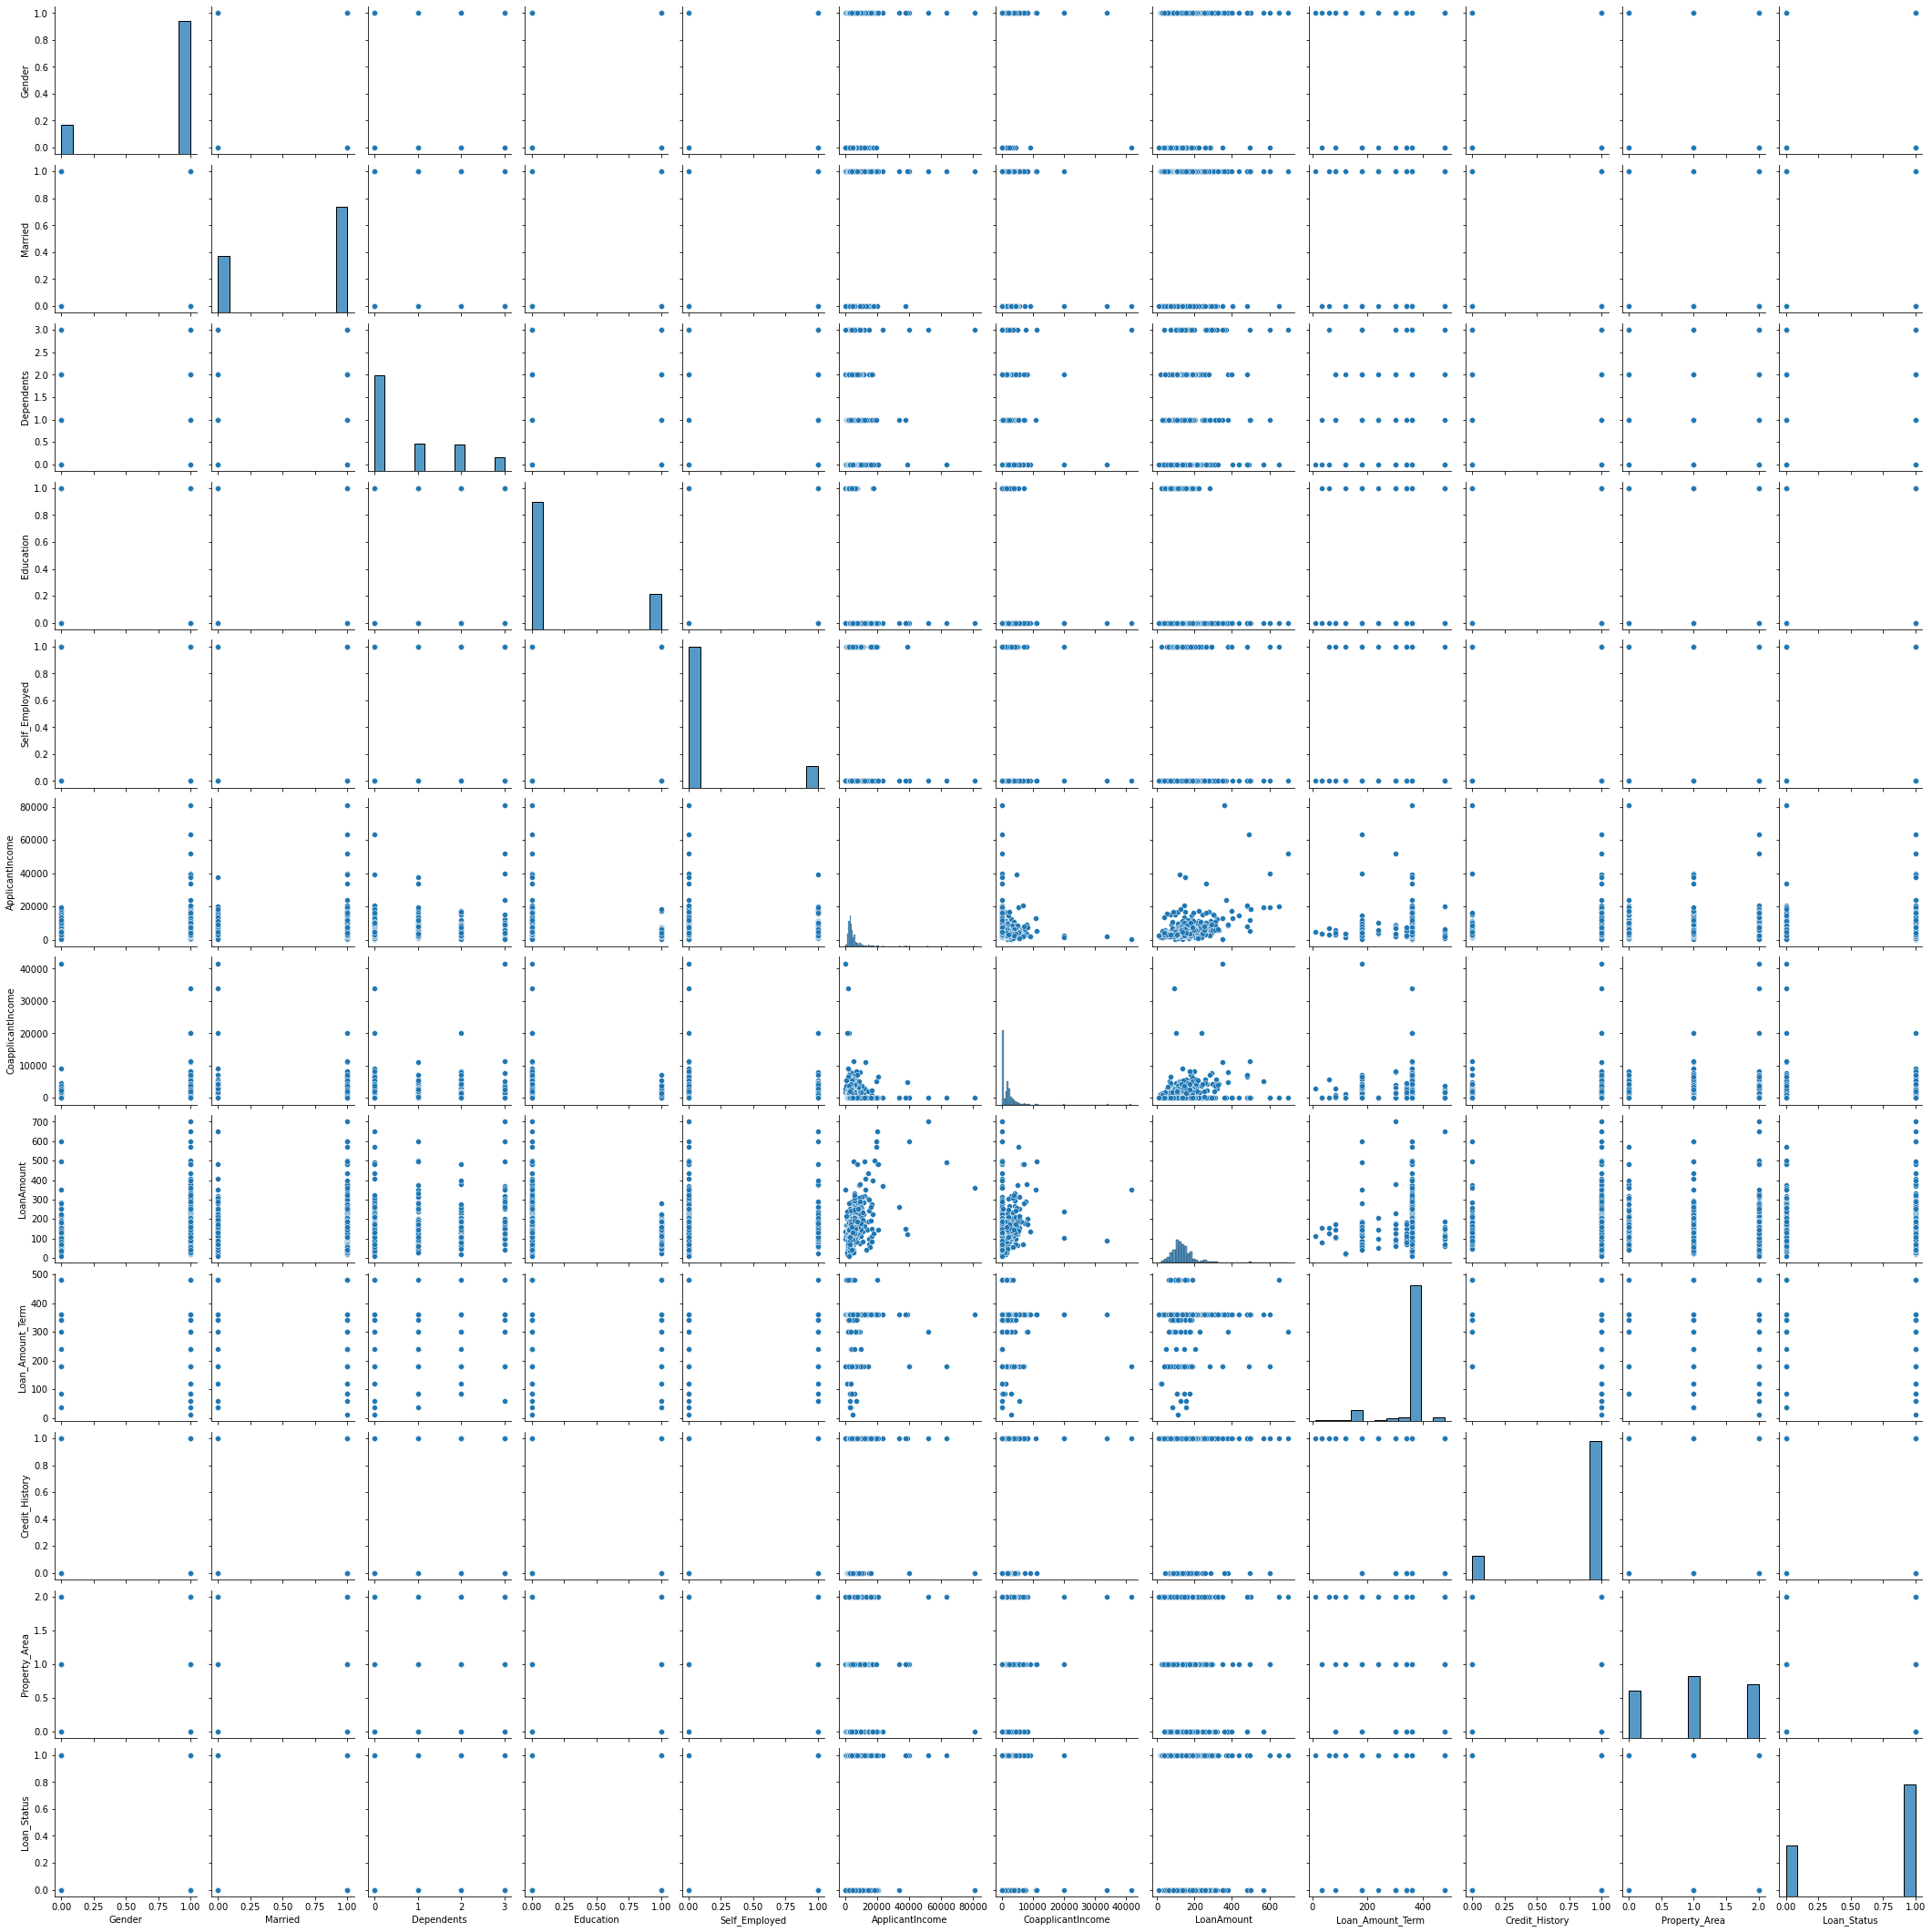

In [39]:
sns.pairplot(df)

# Descriptive statistics

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


outlier present in applicationIncome and CoapplicationIncome

In [44]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


Highest corrlated columns are Income columns here

<AxesSubplot:>

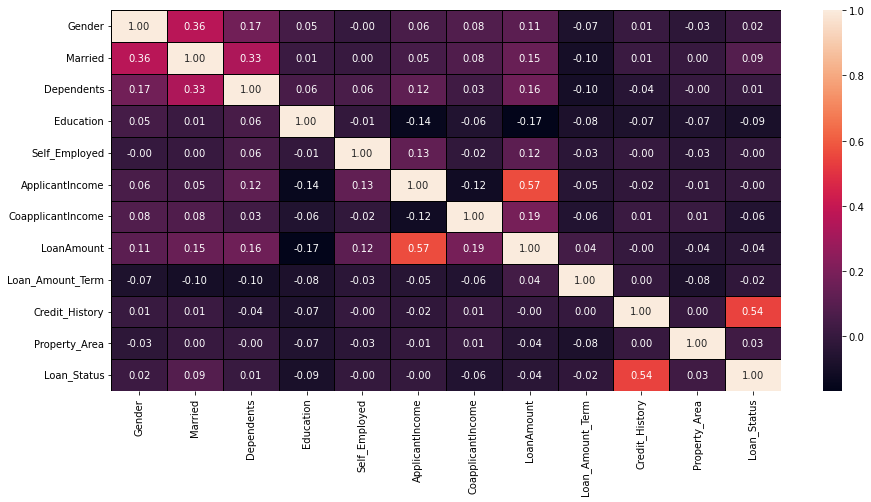

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

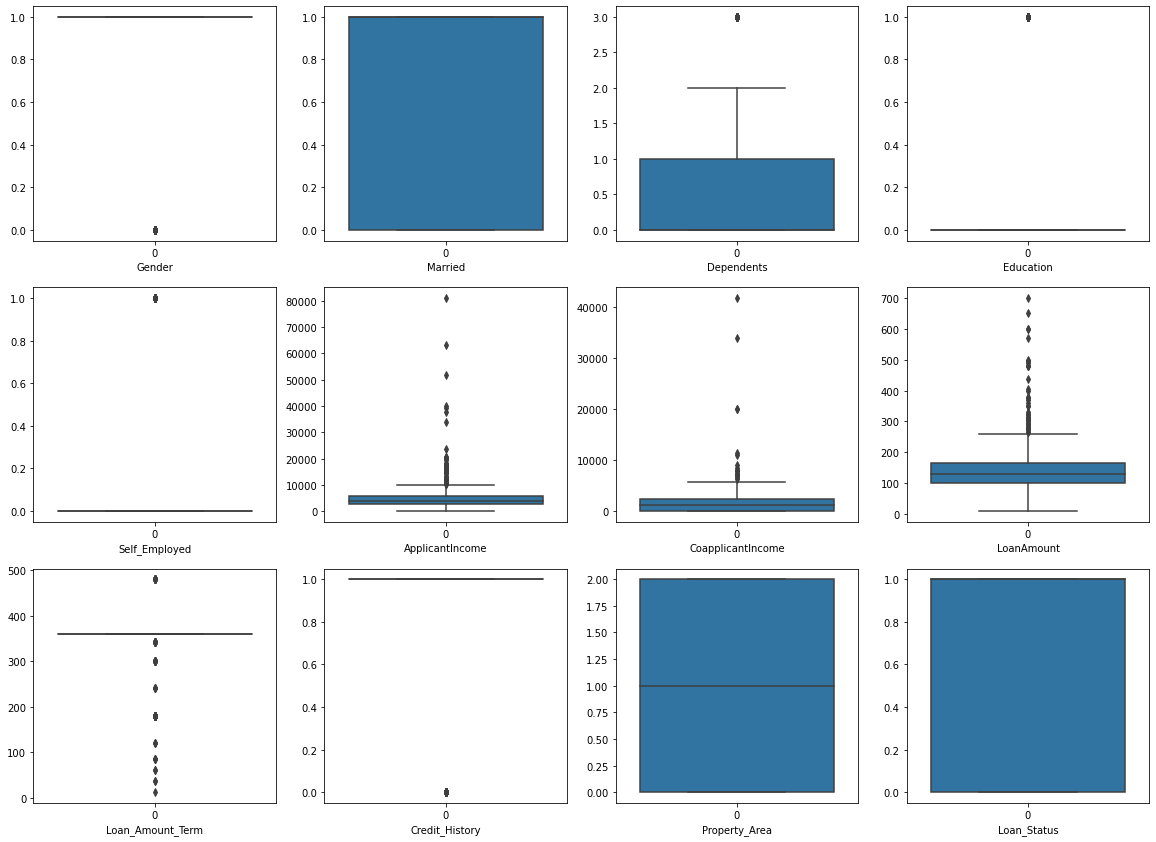

In [46]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

In [49]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [50]:
z.shape

(577, 12)

In [52]:
df.shape

(614, 12)

In [53]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([  9,  14,  68,  94, 126, 130, 133, 155, 171, 177, 183, 185, 242,
            262, 278, 308, 313, 333, 369, 402, 409, 417, 432, 443, 487, 495,
            497, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604],
           dtype='int64')

In [54]:
df.drop(dropindex,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

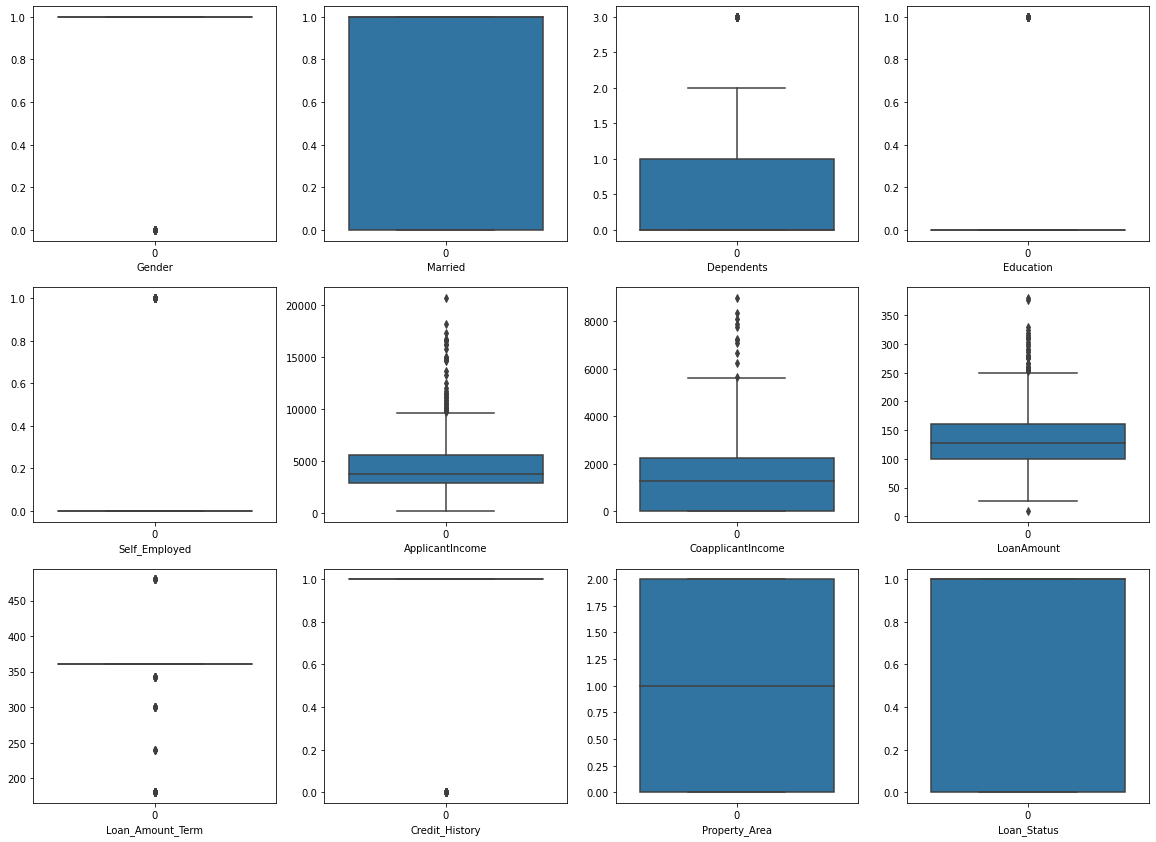

In [55]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

# Check Skewness

In [56]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

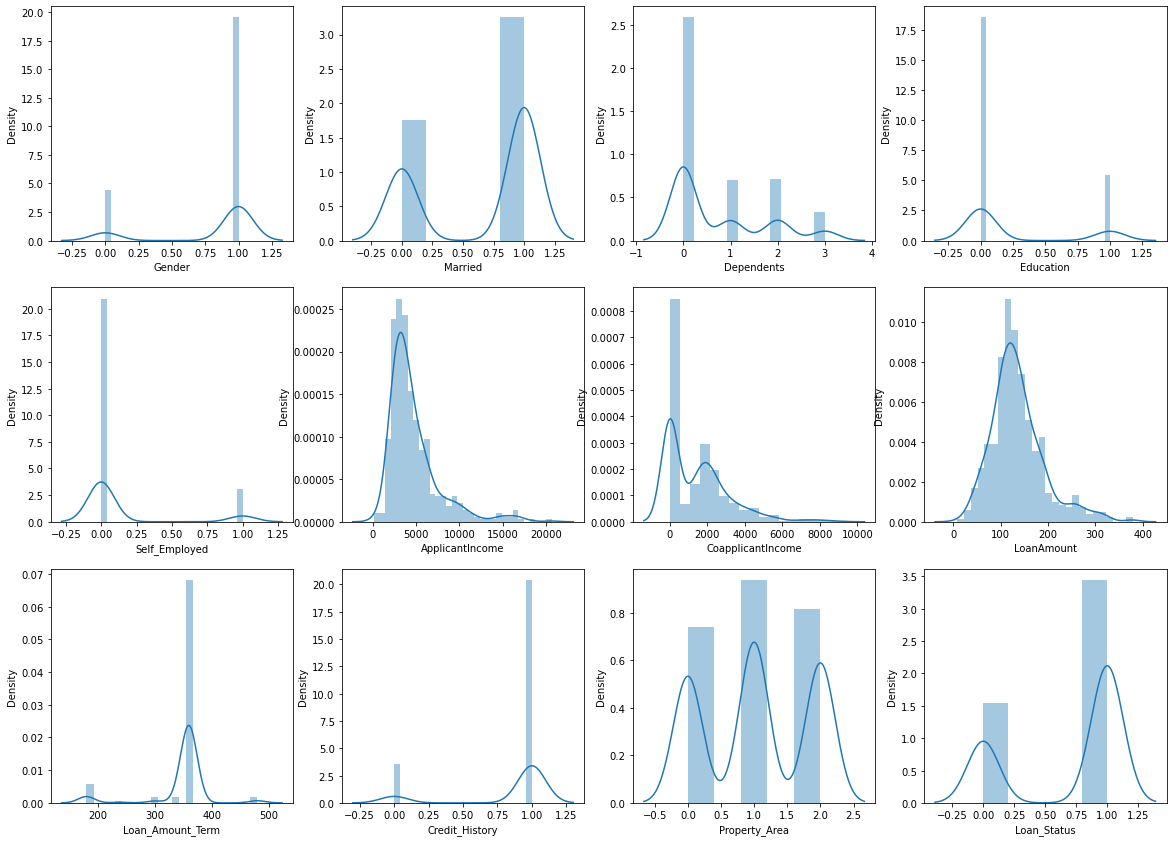

In [57]:
#So skewness is present in data as we can see. Olny property area,Loan_status,married columns are exceptional

plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    

# Removing Skewness using yeo-johnson method

In [58]:
skewed_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [59]:
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.316078,0.142609
1,0.234783,0.744117,-0.015871,0.142609
2,-0.527201,-1.122446,-1.443112,0.142609
3,-0.791972,0.895786,-0.169860,0.142609
4,0.728848,-1.122446,0.221481,0.142609


In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,1.0,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

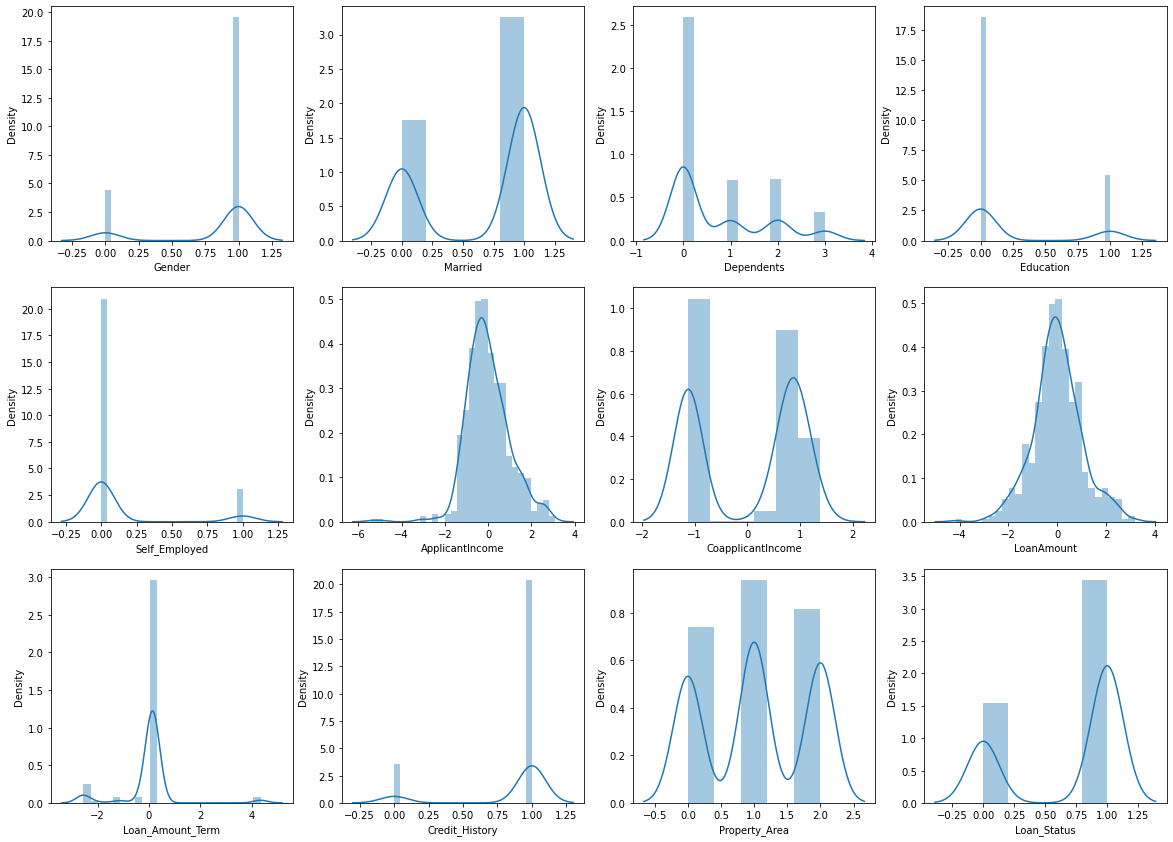

In [61]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

# Outliers and skewness are removed now and we are ready to define X and Y

In [62]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
x.shape

(577, 11)

In [63]:
y.shape

(577,)

In [64]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,1.0,2
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,1.0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,1.0,2
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,1.0,2
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.301481,0.142609,1.0,0
610,1,1,3,0,0,0.035386,-1.122446,-2.321865,-2.559206,1.0,0
611,1,1,1,0,0,1.281658,0.173344,1.838099,0.142609,1.0,2
612,1,1,2,0,0,1.164426,-1.122446,0.961555,0.142609,1.0,2


In [65]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [66]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE



ModuleNotFoundError: No module named 'imblearn'

# feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142609,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142609,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.142609,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142609,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142609,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142609,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559206,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142609,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142609,0.418513,1.227472


# Finding Random State

In [78]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8706896551724138 on Random State: 12


In [79]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [80]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT]


for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=88)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[17 23]
 [ 2 74]]
Classification report :               precision    recall  f1-score   support

           0       0.89      0.42      0.58        40
           1       0.76      0.97      0.86        76

    accuracy                           0.78       116
   macro avg       0.83      0.70      0.72       116
weighted avg       0.81      0.78      0.76       116

Accuracy score : 0.7844827586206896
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[18 22]
 [ 4 72]]
Classification report :               precision    recall  f1-score   support

           0       0.82      0.45      0.58        40
           1       0.77      0.95      0.85        76

    accuracy                           0.78       116
   macro avg       0.79      0.70      0.71       116
weighted avg       0.78      0.78      0.76       116

Accu

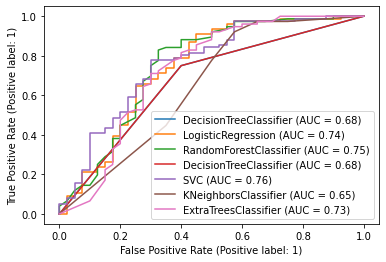

In [81]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,DTC,SV,KNN,EXT]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV

parameters= {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

GCV=GridSearchCV(SV,parameters,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [84]:
print(GCV.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [85]:
Loan_model = SVC(C=1,gamma=0.1,kernel='rbf')
Loan_model.fit(x_train, y_train)
pred = Loan_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.44827586206897


# Saving best model with 78 % Accuracy

In [87]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan_model ,"Loan_prediction_status.pkl")

['Loan_prediction_status.pkl']

# Lets use model to predict again

In [88]:
# Loading the saved model
model=joblib.load("Loan_prediction_status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

In [89]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,0,1
...,...,...
111,1,1
112,1,1
113,1,1
114,1,1


.................................................................